# Daily-Dose-of-Data-Science

[Daily Dose of Data Science](https://avichawla.substack.com) is a publication on Substack that brings together intriguing frameworks, libraries, technologies, and tips that make the life cycle of a Data Science project effortless. 

Author: Avi Chawla

[Medium](https://medium.com/@avi_chawla) | [LinkedIn](https://www.linkedin.com/in/avi-chawla/)

# This Small Tweak Can Significantly Boost The Run-time of KMeans

Post Link: [Substack](https://avichawla.substack.com/p/this-small-tweak-can-significantly)

LinkedIn Post: [LinkedIn](https://www.linkedin.com/feed/update/urn:li:activity:7039558488242466816/)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

mpl.rcParams['figure.dpi'] = 300
colors = ['red', 'green', 'blue', 'orange']
c_list = ['#46C7C7', '#00B9FF', '#FF7051']

%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
# generate some 2D data

X = np.vstack([
    np.random.randn(100, 2) + np.array([3, 3]),
    np.random.randn(100, 2) + np.array([-3, 3]),
    np.random.randn(100, 2) + np.array([3, -3]),
    np.random.randn(100, 2) + np.array([-3, -3])
])

### KMeans

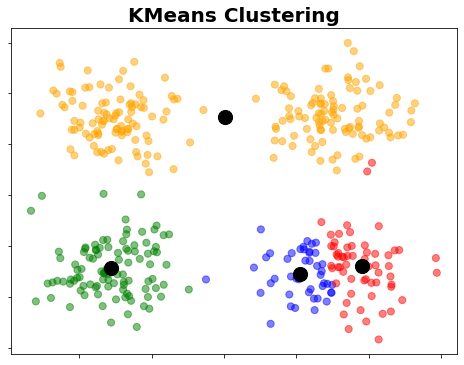

In [35]:
def kmeans_init(X, K):
    centroids = X[np.random.choice(range(X.shape[0]), size=K, replace=False)]
    return centroids

def kmeans(X, K, max_iters=10):
    centroids = kmeans_init(X, K)
    for i in range(max_iters):
        # assign each point to the nearest centroid
        distances = np.linalg.norm(X[:, None] - centroids, axis=2)
        cluster_ids = np.argmin(distances, axis=1)
        # update centroids to be the mean of the points assigned to them
        for k in range(K):
            centroids[k] = np.mean(X[cluster_ids == k], axis=0)
    return cluster_ids, centroids


# run k-means algorithm
cluster_ids, centroids = kmeans(X, K=4)

# plot the data with color-coded final clusters
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], c=[colors[i] for i in cluster_ids], s=50, alpha=0.5)
ax.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200)
ax.set_title('KMeans Clustering', fontsize = 20, fontweight="bold")

ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()

### KMeans++

In [4]:
def kmeans_init(X, K):
    centroids = np.zeros((K, X.shape[1]))
    centroids[0] = X[np.random.choice(range(X.shape[0]))]
    for k in range(1, K):
        D = np.zeros(X.shape[0])
        for i, x in enumerate(X):
            distances = np.linalg.norm(x - centroids[:k], axis=1)
            D[i] = np.min(distances)**2
        
        centroids[k] = X[np.argmax(D)]

    return centroids

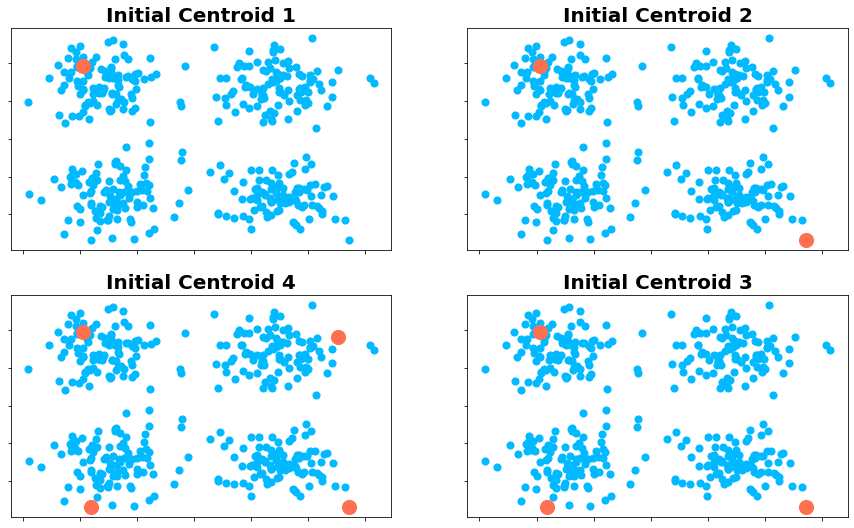

In [5]:
# plot the data and the initial centroids in a 2x2 grid
centroids = kmeans_init(X, K=4)
fig, axs = plt.subplots(2, 2, figsize=(15, 9))
scatter_color_idx = 1
centroid_color_idx = 2

axs[0, 0].scatter(X[:, 0], X[:, 1], s=50, c = c_list[scatter_color_idx])
axs[0, 0].scatter(centroids[:1, 0], centroids[:1, 1], c=c_list[centroid_color_idx], s=200)
axs[0, 0].set_title("Initial Centroid 1", fontsize = 20, fontweight="bold")
axs[0, 0].set_xticklabels([])
axs[0, 0].set_yticklabels([])

axs[0, 1].scatter(X[:, 0], X[:, 1], s=50, c = c_list[scatter_color_idx])
axs[0, 1].scatter(centroids[:2, 0], centroids[:2, 1], c=c_list[centroid_color_idx], s=200)
axs[0, 1].set_title("Initial Centroid 2", fontsize = 20, fontweight="bold")
axs[0, 1].set_xticklabels([])
axs[0, 1].set_yticklabels([])

axs[1, 0].scatter(X[:, 0], X[:, 1], s=50, c = c_list[scatter_color_idx])
axs[1, 0].scatter(centroids[:4, 0], centroids[:4, 1], c=c_list[centroid_color_idx], s=200)
axs[1, 0].set_title("Initial Centroid 4", fontsize = 20, fontweight="bold")
axs[1, 0].set_xticklabels([])
axs[1, 0].set_yticklabels([])

axs[1, 1].scatter(X[:, 0], X[:, 1], s=50, c = c_list[scatter_color_idx])
axs[1, 1].scatter(centroids[:3, 0], centroids[:3, 1], c=c_list[centroid_color_idx], s=200)
axs[1, 1].set_title("Initial Centroid 3", fontsize = 20, fontweight="bold")
axs[1, 1].set_xticklabels([])
axs[1, 1].set_yticklabels([])

plt.show()

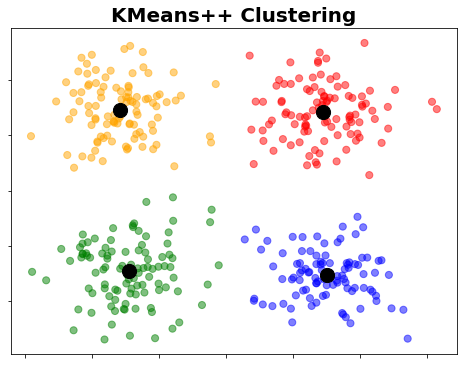

In [6]:
def kmeans(X, K, max_iters=100):
    centroids = kmeans_init(X, K)
    for i in range(max_iters):
        # assign each point to the nearest centroid
        distances = np.linalg.norm(X[:, None] - centroids, axis=2)
        cluster_ids = np.argmin(distances, axis=1)
        # update centroids to be the mean of the points assigned to them
        for k in range(K):
            centroids[k] = np.mean(X[cluster_ids == k], axis=0)
    return cluster_ids, centroids

# run k-means++ algorithm
cluster_ids, centroids = kmeans(X, K=4)

colors = ['red', 'green', 'blue', 'orange']

# plot the data with color-coded final clusters
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], c=[colors[i] for i in cluster_ids], s=50, alpha=0.5)
ax.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200)
ax.set_title('KMeans++ Clustering', fontsize = 20, fontweight="bold")
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()